In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [58]:
import torch 
import math

In [59]:
# to read file in csv form 

data = pd.read_csv("/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv")

In [60]:
# to print upper part of data 

data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [61]:
# to print lower part of data 

data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [62]:
# return the dimension of dataframes 

data.shape

(10000, 10)

In [63]:
# returns the column labels (names)

data.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [64]:
# modifies the first column : slice it from the 4th character onward and covert into integer 

data[data.columns[0]] = data[data.columns[0]].apply(lambda x: int(x[3:]))

In [65]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,No,8,8,4,No
1,61,97,5.52,5.37,8,No,7,8,0,No
2,36,109,5.36,5.83,9,No,3,1,1,No
3,55,122,5.47,5.75,6,Yes,1,6,1,No
4,4,96,7.91,7.69,7,No,8,10,2,No


In [66]:
# dictionary that maps string values to integer

no_yes_dict = {"No":0, "Yes":1}


In [67]:
# Assigns the converted values back to 6th column in the DataFrame

data[data.columns[5]] = data[data.columns[5]].map(no_yes_dict)


In [68]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,0,8,8,4,No
1,61,97,5.52,5.37,8,0,7,8,0,No
2,36,109,5.36,5.83,9,0,3,1,1,No
3,55,122,5.47,5.75,6,1,1,6,1,No
4,4,96,7.91,7.69,7,0,8,10,2,No


In [69]:
data[data.columns[9]] = data[data.columns[9]].map(no_yes_dict)

In [70]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,0,8,8,4,0
1,61,97,5.52,5.37,8,0,7,8,0,0
2,36,109,5.36,5.83,9,0,3,1,1,0
3,55,122,5.47,5.75,6,1,1,6,1,0
4,4,96,7.91,7.69,7,0,8,10,2,0


In [71]:
# to create a correlation matrix for dataFrame : pairwise correlation between numeric columns 

corr_matrix = data.corr()


In [72]:
# +1 → Perfect positive correlation , 0 → No correlation , –1 → Perfect negative correlation

corr_matrix


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
College_ID,1.000000,0.002473,-0.004060,-0.003422,-0.015442,0.012037,-0.003931,-0.005194,0.004903,0.002750
IQ,0.002473,1.000000,-0.002640,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
Prev_Sem_Result,-0.004060,-0.002640,1.000000,0.980768,-0.005765,-0.013347,0.009326,-0.017269,0.018434,0.317896
CGPA,-0.003422,-0.002859,0.980768,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.015442,-0.006827,-0.005765,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_Experience,0.012037,-0.000247,-0.013347,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003931,-0.003458,0.009326,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.005194,-0.010896,-0.017269,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.004903,0.014538,0.018434,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement,0.002750,0.285914,0.317896,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


<Axes: >

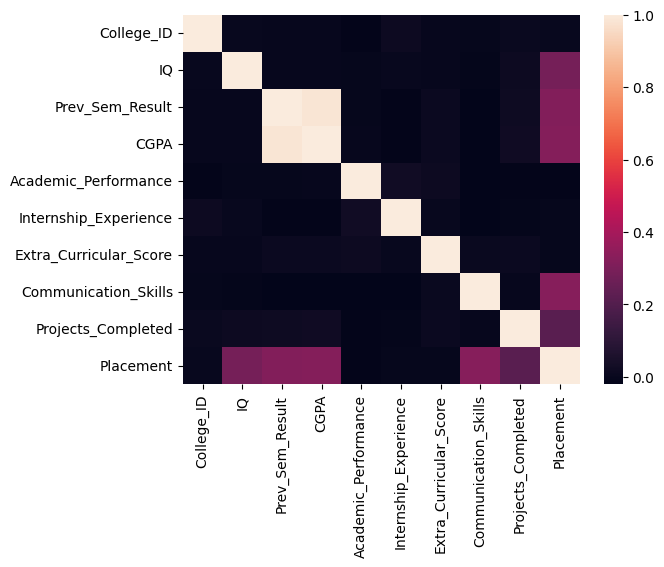

In [73]:
# visualization of the correlation matrix : lighter color-> strong correlation , darker color -> weak correlation 

sns.heatmap(corr_matrix)


In [74]:
# selecting specific columns by index

feature_selected_data = data[[data.columns[1],data.columns[2],data.columns[3],data.columns[7],data.columns[8],data.columns[9]]]

#alternative method 
# selected_columns = ['College_id', 'IQ', 'Prev_sem', 'col_name7', 'col_name8', 'col_name9']
# feature_selected_data = data[selected_columns]
# and 
# feature_selected_data = data.iloc[0:10000,[1,2,3,7,8,9]]

In [75]:
feature_selected_data 

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,4,0
1,97,5.52,5.37,8,0,0
2,109,5.36,5.83,1,1,0
3,122,5.47,5.75,6,1,0
4,96,7.91,7.69,10,2,0
...,...,...,...,...,...,...
9995,119,8.41,8.29,8,0,1
9996,70,9.25,9.34,7,2,0
9997,89,6.08,6.25,9,5,0
9998,107,8.77,8.92,5,1,0


<Axes: >

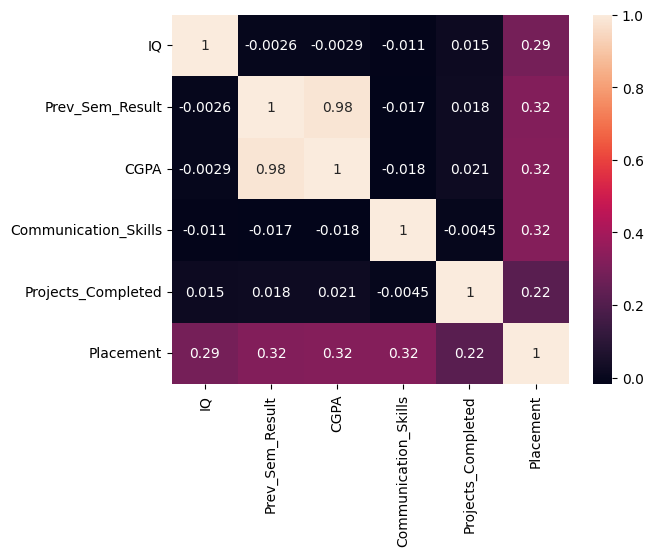

In [76]:
# heatmap that visualizes the pairwise correlation coefficients between the features in the feature_selected_data

sns.heatmap(feature_selected_data.corr(), annot = True )

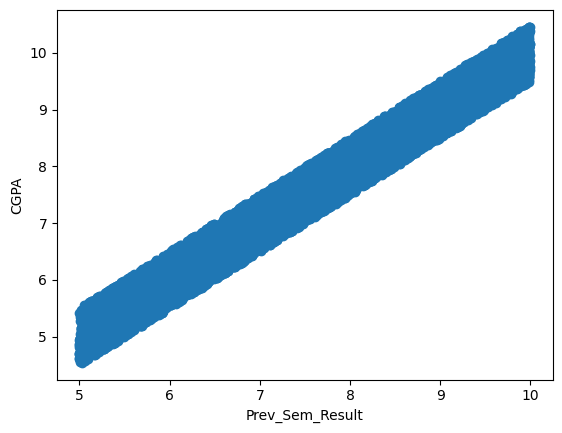

In [77]:
# a scatter plot between the second and third columns of the feature_selected_data

plt.xlabel("Prev_Sem_Result")
plt.ylabel("CGPA")

plt.scatter(feature_selected_data[feature_selected_data.columns[1]],feature_selected_data[feature_selected_data.columns[2]])

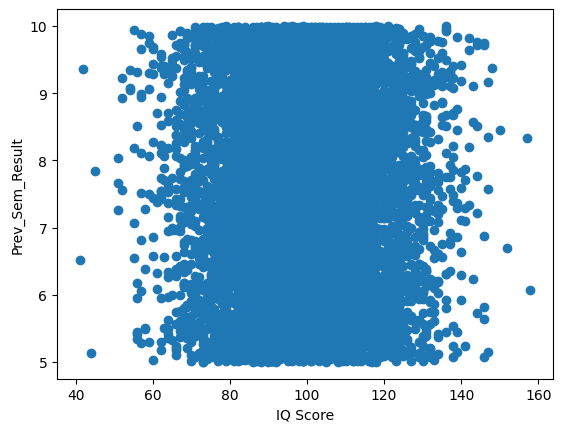

In [78]:
# a scatter plot

plt.xlabel("IQ Score")
plt.ylabel("Prev_Sem_Result")

plt.scatter(feature_selected_data["IQ"],feature_selected_data['Prev_Sem_Result'])

In [79]:
# covariance matrix for the first 5 columns of the feature_selected_data and every rows 

feature_selected_data.iloc[:, 0:5].cov()

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed
IQ,226.595864,-0.057524,-0.063274,-0.475805,0.375515
Prev_Sem_Result,-0.057524,2.095311,2.087130,-0.072513,0.045787
CGPA,-0.063274,2.087130,2.161315,-0.077796,0.052655
Communication_Skills,-0.475805,-0.072513,-0.077796,8.415022,-0.022330
Projects_Completed,0.375515,0.045787,0.052655,-0.022330,2.944515


In [80]:
# determinant of the covariance matrix for the first 5 columns

np.linalg.det(feature_selected_data.iloc[:, 0:5].cov())

967.3939913725411

In [81]:
# inverse of the covariance matrix of the first 5 columns

np.linalg.inv(feature_selected_data.iloc[:, 0:5].cov())

array([[ 4.41464863e-03, -2.41818301e-04,  3.85490149e-04,
         2.49597203e-04, -5.64242649e-04],
       [-2.41818301e-04,  1.25298770e+01, -1.21004753e+01,
        -3.85297309e-03,  2.15477570e-02],
       [ 3.85490149e-04, -1.21004753e+01,  1.21488302e+01,
         7.98836551e-03, -2.90765920e-02],
       [ 2.49597203e-04, -3.85297309e-03,  7.98836551e-03,
         1.18891950e-01,  7.86873738e-04],
       [-5.64242649e-04,  2.15477570e-02, -2.90765920e-02,
         7.86873738e-04,  3.39877333e-01]])

In [82]:
#the proportion or probability of records in the dataset where the last column equals 1

placement_equals_1_prior = data[data[data.columns[-1]]==1].shape[0]/data.shape[0]

In [83]:
placement_equals_1_prior

0.1659

In [84]:
# studend who placed 

placement_equals_1_data = feature_selected_data[data["Placement"]==1]

In [85]:
placement_equals_1_data

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
6,123,6.68,6.58,8,2,1
7,111,8.77,8.76,1,2,1
18,86,8.20,8.15,9,4,1
20,121,8.41,8.07,3,3,1
23,78,8.67,9.17,10,2,1
...,...,...,...,...,...,...
9964,123,9.93,10.01,4,5,1
9978,84,9.87,9.69,9,4,1
9992,109,9.92,10.09,10,3,1
9994,117,8.71,8.44,4,4,1


(array([ 26., 181., 382., 840., 215.,  15.]),
 array([ 56.,  73.,  90., 107., 124., 141., 158.]),
 <BarContainer object of 6 artists>)

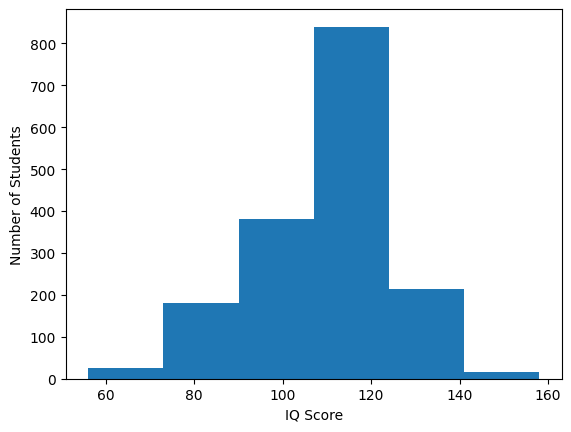

In [86]:
# histogram of IQ scores for placed students, divided into 6 bins

plt.xlabel("IQ Score")
plt.ylabel("Number of Students")

plt.hist(placement_equals_1_data["IQ"],bins = 6)

In [87]:
# Extracts all feature columns (except the last one) from the DataFrame and stores them as a NumPy array.

X = np.array(feature_selected_data.iloc[:,0:-1])

# covariance matrix of the features, treating each column as a variable.

cov_mat = np.cov(X, rowvar = False)

# Singular Value Decomposition (SVD) on the covariance matrix to obtain eigenvalues and eigenvectors.

F = np.linalg.svd(cov_mat)

In [88]:
# F will provide three matrix : U =eigen vector matrix , S= eigen value matrix , Vh= inverse matrix of e vector
F

SVDResult(U=array([[-9.99996139e-01, -2.17743344e-03, -3.46642553e-04,
        -1.69114141e-03,  1.81562132e-05],
       [ 2.57815004e-04,  1.75779405e-02, -7.00202535e-01,
        -3.92089239e-02, -7.12649998e-01],
       [ 2.83169595e-04,  1.83550525e-02, -7.11415827e-01,
        -3.77209711e-02,  7.01518112e-01],
       [ 2.18074163e-03, -9.99665581e-01, -2.56049574e-02,
         2.87028185e-03,  3.43247779e-04],
       [-1.67910057e-03,  4.25354616e-03, -5.42973035e-02,
         9.98513240e-01, -1.48345515e-03]]), S=array([2.26597565e+02, 8.41678439e+00, 4.21673530e+00, 2.94002762e+00,
       4.09142123e-02]), Vh=array([[-9.99996139e-01,  2.57815004e-04,  2.83169595e-04,
         2.18074163e-03, -1.67910057e-03],
       [-2.17743344e-03,  1.75779405e-02,  1.83550525e-02,
        -9.99665581e-01,  4.25354616e-03],
       [-3.46642553e-04, -7.00202535e-01, -7.11415827e-01,
        -2.56049574e-02, -5.42973035e-02],
       [-1.69114141e-03, -3.92089239e-02, -3.77209711e-02,
         2

In [89]:
# matrix of eigenvectors (principal directions) from the SVD result
E = F[0]

# singular values (which correspond to the eigenvalues of the covariance matrix)
lamda = F[1]

In [90]:
E.shape

(5, 5)

In [91]:
# the first eigenvector
E[:,0]

array([-9.99996139e-01,  2.57815004e-04,  2.83169595e-04,  2.18074163e-03,
       -1.67910057e-03])

In [92]:
# all eigenvectors (principal components)
E[:,0:-1]

array([[-9.99996139e-01, -2.17743344e-03, -3.46642553e-04,
        -1.69114141e-03],
       [ 2.57815004e-04,  1.75779405e-02, -7.00202535e-01,
        -3.92089239e-02],
       [ 2.83169595e-04,  1.83550525e-02, -7.11415827e-01,
        -3.77209711e-02],
       [ 2.18074163e-03, -9.99665581e-01, -2.56049574e-02,
         2.87028185e-03],
       [-1.67910057e-03,  4.25354616e-03, -5.42973035e-02,
         9.98513240e-01]])

In [93]:
# computes the dot product between the first and second eigenvectors, which should be 0 if they are orthogonal.

np.dot(E[:,0],E[:,1])  #orthogonal

4.2595875507287843e-19

In [94]:
# Normalized 
np.dot(E[:,0],E[:,0])

1.0000000000000004

In [95]:
#eigen values matrix
lamda

array([2.26597565e+02, 8.41678439e+00, 4.21673530e+00, 2.94002762e+00,
       4.09142123e-02])

In [96]:
# changing our data or projects the original data X onto the principal component axes (eigenvectors){PCA-transformed data}

new_X = np.matmul(X,F[0])

In [97]:
# covariance matrix of the PCA-transformed data
    
new_cov_mat = np.cov(new_X, rowvar=False)

In [98]:
new_cov_mat.shape

(5, 5)

<Axes: >

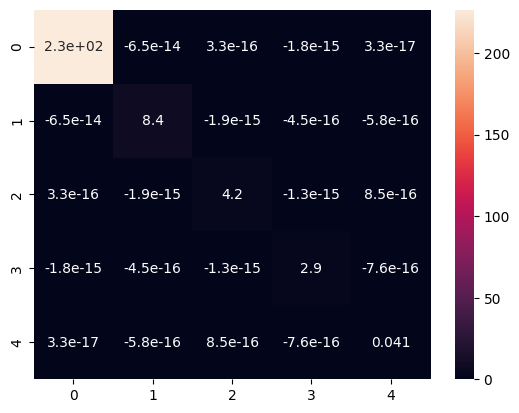

In [99]:
sns.heatmap(new_cov_mat, annot=True)

In [100]:
# converts the PCA-transformed NumPy array new_X into a pandas DataFrame with custom column names

new_features = pd.DataFrame(data = new_X ,
                            columns = ["Input_feat_1","Input_feat_2","Input_feat_3","Input_feat_4","Input_feat_5"])

In [101]:
new_features

,Input_feat_1,Input_feat_2,Input_feat_3,Input_feat_4,Input_feat_5
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179
...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777


<Axes: >

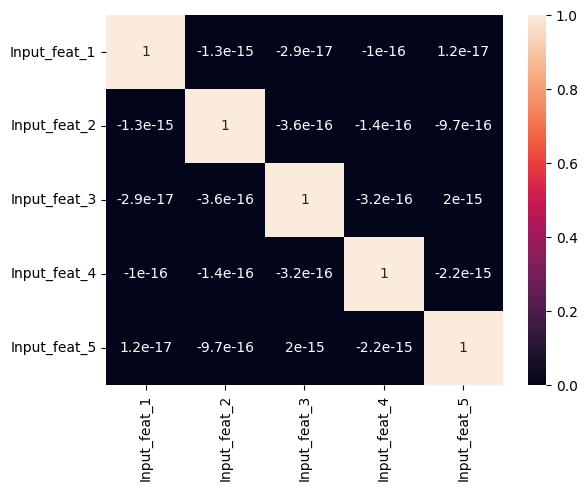

In [102]:
sns.heatmap(new_features.corr(), annot=True)

In [103]:
# it horizontally combines the new_features DataFrame with the last column (by name) from feature_selected_data
new_data = pd.concat([new_features,feature_selected_data[data.columns[-1]]],axis=1)

In [104]:
new_data

,Input_feat_1,Input_feat_2,Input_feat_3,Input_feat_4,Input_feat_5,Placement
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328,0
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169,0
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885,0
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325,0
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179,0
...,...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895,1
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127,0
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864,0
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777,0


<Axes: >

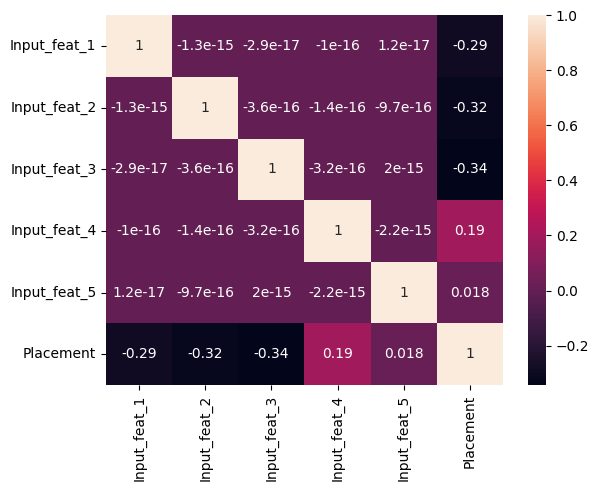

In [105]:
sns.heatmap(new_data.corr(),annot=True)

(array([  3.,  22., 101., 362., 572., 236., 208., 109.,  38.,   8.]),
 array([-157.98374855, -147.7834374 , -137.58312626, -127.38281511,
        -117.18250397, -106.98219282,  -96.78188168,  -86.58157053,
         -76.38125939,  -66.18094824,  -55.98063709]),
 <BarContainer object of 10 artists>)

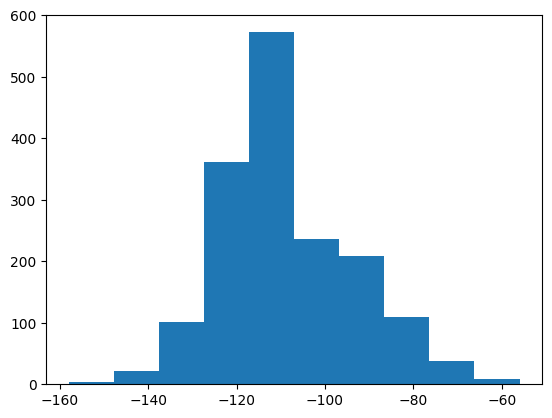

In [106]:
plt.hist(new_data[new_data[new_data.columns[-1]] == 1][new_data.columns[0]])

In [107]:
new_data[new_data[new_data.columns[-1]]== 1][new_data.columns[0]]

6      -122.981852
7      -110.996007
18      -85.982336
20     -120.993575
23      -77.976418
           ...    
9964   -122.993803
9978    -83.981477
9992   -108.977394
9994   -116.992906
9995   -118.977579
Name: Input_feat_1, Length: 1659, dtype: float64

In [108]:
#  blueprint of neural network of likelihood function
# --->learns μ and σ of a Gaussian distribution
# --->computes the negative log-likelihood of data given those two parameters(μ ,σ)

class GaussianMLEstimatorNN(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.mu = torch.nn.Parameter(data = torch.tensor([-90.0]))
        self.log_sigma = torch.nn.Parameter(data= torch.tensor([1.0]))

    def forward(self , x):
        
        g = -self.mu
        h = (x + g)
        i = h ** 2
        sigma = torch.exp(self.log_sigma)
        j = (-1/(2*sigma**2))*i
        k = torch.exp(j)
        l = (1/(math.sqrt(2*math.pi)*sigma))*k
        f = torch.log(l)
        return -torch.mean(f)

In [109]:
#neural network
# ---> create an instance of the Gaussian MLE(Maximum Likelihood Estimation ) neural network model

MLEstimatorNN = GaussianMLEstimatorNN()

In [110]:
# ---> Extracts the first column values where the last column equals 1, and converts them into a PyTorch tensor

x = torch.tensor(new_data[new_data[new_data.columns[-1]]== 1][new_data.columns[0]].values)

In [111]:
#an SGD optimizer to iteratively adjust μ and σ for maximum likelihood fitting
# --->initialize Gradient Descent optimizer to update the model's parameters (mu and sigma) with a learning rate of 0.1

optimizer = torch.optim.SGD( params = MLEstimatorNN.parameters(), lr =0.1)

In [112]:
#tolerance defines how small that improvement can be before you decide to stop training or iteration.

tol = 10**(-8)

In [113]:
epoch = 0

while True:

    initial_loss_function_value = MLEstimatorNN(x)
    optimizer.zero_grad()
    initial_loss_function_value.backward()
    optimizer.step()
    final_loss_function_value = MLEstimatorNN(x)

    if torch.abs(initial_loss_function_value - final_loss_function_value)< tol:
        break

    epoch +=1
    print("The value of the Gaussian NLL after Epoch # {} is {}".format(epoch, initial_loss_function_value))
    


The value of the Gaussian NLL after Epoch # 1 is 42.26602906631201
The value of the Gaussian NLL after Epoch # 2 is 9.888361837868734
The value of the Gaussian NLL after Epoch # 3 is 9.788363461747323
The value of the Gaussian NLL after Epoch # 4 is 9.68836625249935
The value of the Gaussian NLL after Epoch # 5 is 9.588369440294134
The value of the Gaussian NLL after Epoch # 6 is 9.48837277249125
The value of the Gaussian NLL after Epoch # 7 is 9.388377625607717
The value of the Gaussian NLL after Epoch # 8 is 9.28838297958875
The value of the Gaussian NLL after Epoch # 9 is 9.188389844557458
The value of the Gaussian NLL after Epoch # 10 is 9.088397513361128
The value of the Gaussian NLL after Epoch # 11 is 8.988407106843695
The value of the Gaussian NLL after Epoch # 12 is 8.888419317617034
The value of the Gaussian NLL after Epoch # 13 is 8.788434341147953
The value of the Gaussian NLL after Epoch # 14 is 8.688452512690567
The value of the Gaussian NLL after Epoch # 15 is 8.58847465

In [114]:
list(MLEstimatorNN.parameters())

[Parameter containing:
 tensor([-108.8365], requires_grad=True),
 Parameter containing:
 tensor([2.7219], requires_grad=True)]